In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
#calling Regression model
from sklearn.ensemble import RandomForestRegressor
# calling plot
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error , root_mean_squared_error

In [2]:
url='https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv'

In [3]:
EQdf=pd.read_csv(url)

In [4]:
#EQdf.info()

In [5]:
input_features=['latitude','longitude','depth']
label = 'mag'

In [6]:
#drop any nan values
EQdf = EQdf.dropna(subset=[label]) 

In [7]:
# set median value to nan in features
for col in input_features:
    EQdf[col] = EQdf[col].fillna(EQdf[col].median())

In [8]:
#print(input_features)

miss_Lat = np.where(EQdf.iloc[:, 1] == np.nan)
miss_Lon = np.where(EQdf.iloc[:, 2] == np.nan)
miss_depth = np.where(EQdf.iloc[:, 3] == np.nan)



In [11]:
# Scatter plot with color and shape customization Example
#sns.scatterplot(data=df, x='x', y='y', hue='category1', style='category2',
 #               palette={'A': 'red', 'B': 'blue', 'C': 'green'},
  #              markers={'X': 'o', 'Y': '^'},
   #             s=100, # Size of markers
    #            alpha=0.7 # Transparency of markers
               #)

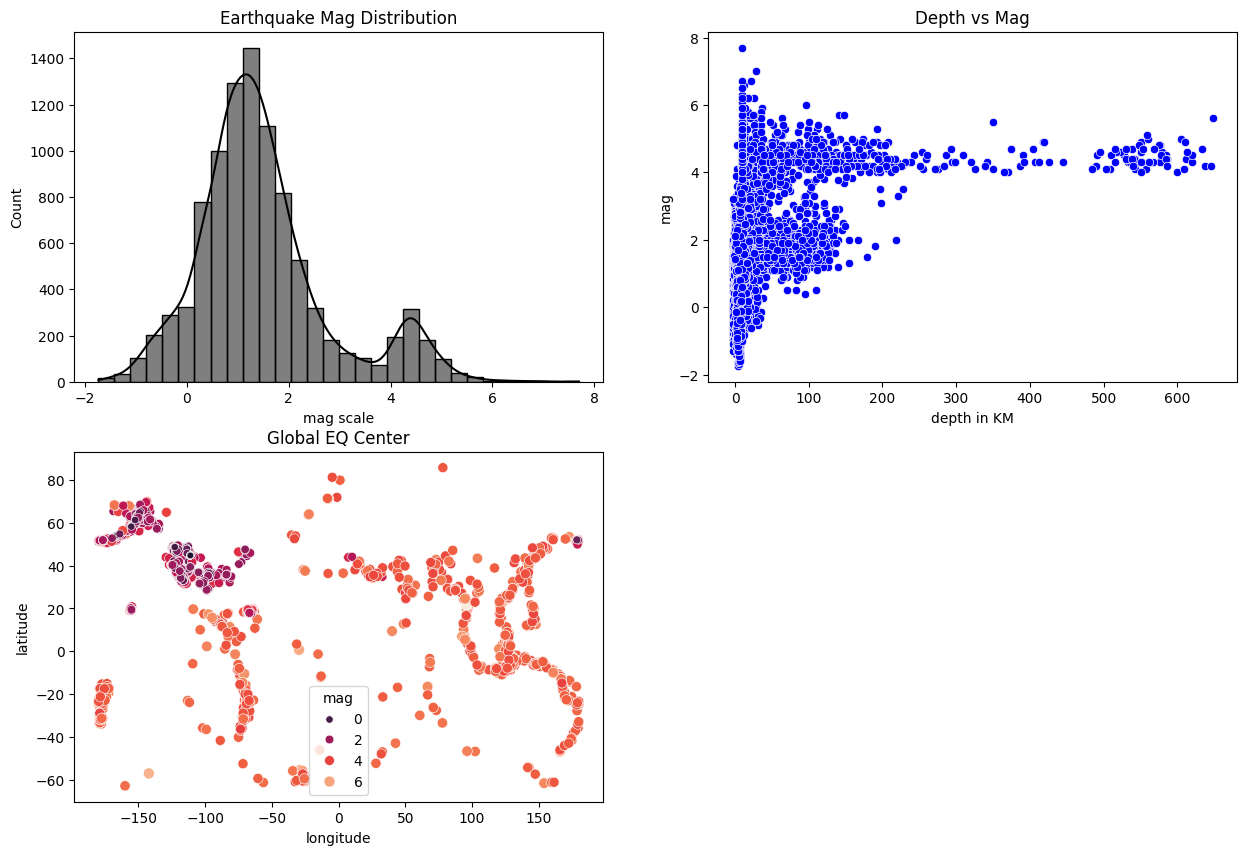

In [12]:
# some basic visuals for data analysis
plt.figure(figsize=(15,10))

#first plot #EQ distribution
plt.subplot(2,2,1)
plt.title("Earthquake Mag Distribution")
plt.xlabel("mag scale")
sb.histplot(EQdf[label],kde=True,bins=30,color='black') #

#second plot Depth vs Mag
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.xlabel("depth in KM")
sb.scatterplot(x='depth',y=label,data=EQdf,color='blue')

#subplot 3 Global Locations
plt.subplot(2,2,3)
plt.title("Global EQ Center")
plt.xlabel("longitude")
plt.ylabel("latitude")
sb.scatterplot(x='longitude',y='latitude',size=label,data=EQdf
               ,hue=label,palette='rocket')
               #,color="red")

plt.show()

In [33]:
# reconsider features and labels
feature_data = EQdf[input_features]
label_data = EQdf[label]

In [14]:
# split data into training/testing
training_ft, testing_ft, train_lb, test_lb = train_test_split(feature_data,label_data,test_size=0.2,random_state=100)

In [17]:
# calling Regression model
Reg_model = RandomForestRegressor()

In [19]:
# train the regression model
trained_model = Reg_model.fit(training_ft,train_lb)

In [25]:
# make prediction
pred_Mags = trained_model.predict(testing_ft)
#print(pred_Mags)

In [32]:
# doing model eval using MSE, MAE, RMSE, R-squared
Mag_rmse = root_mean_squared_error(test_lb,pred_Mags)
Mag_mae = mean_absolute_error(test_lb,pred_Mags)
Mag_r2 = r2_score(test_lb,pred_Mags)
Mag_mse = mean_squared_error(test_lb,pred_Mags)
print(f"Model MSE : {Mag_mse:.4f}")
print(f"Model RMSE : {Mag_rmse:.4f}")
print(f"Model MAE : {Mag_mae:.4f}")
print(f"Model R-squared : {Mag_r2:.4f}")

Model MSE : 0.2360
Model RMSE : 0.4858
Model MAE : 0.3537
Model R-squared : 0.8513
